In [1]:
import matplotlib
import numpy as np
from scipy import *
from sympy import *
init_printing(use_unicode=True)

In [2]:
# Primera aproximacion a el calculo simbolico con sympy
def simple(o1,o2):
    t1,t2=symbols('t%d t%d'%(o1,o2))
    denominador=(t1-t2)**o1
    numerador=(t1+t2)**o2
    division=div(numerador, denominador)
    return division

In [3]:
simple(5,7)

In [4]:
# Segunda aproximacion a sympy
def simple2(n):
    x=var('t%d'%n)
    return x**n

In [5]:
simple2(4)

#Calculo symbolico
##(a) Polinomios de lagrange

In [6]:
# Primer punto de la tarea parte a
def lagrange(orden):
    # Se asigna un valor simbolico a la as variable t   
    t=var('t')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    
    # Se recoren los arreglos que tinene los valores de f y t para generar el polinomio
    for n in range(orden):
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
        
    #La fucion retorna el polinomio
    return adam

    
   
    

In [7]:
lagrange(1)

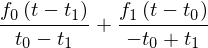

In [8]:
lagrange(2)

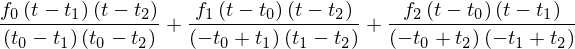

In [9]:
lagrange(3)

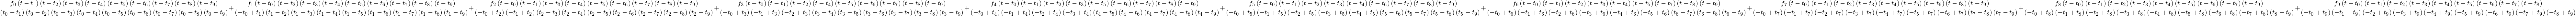

In [10]:
lagrange (10)

##(b) Adams Bashford

In [11]:
# segundo punto a partir de modificar un poco el metodo anterior
def adams1(orden):
    # Se asigna un valor simbolico a la as variable t y h  
    t=var('t')
    h=var('h')
    
    # Se declaran dos arreglos uno para los valores de f y sus subindices, lo mismo para t
    F=[]
    T=[]
    
    # Se inicializa los valores de t y f segun el orden que entro por parametro
    for i in range(orden):
        F.append(var('f%d'%i))
        T.append(var('t%d'%i))
    print T[0]
    # Se inicializa la variable d la expresion para el polinomio 
    adam=0
    
    # Se recorren los arreglos para generara los polinomios
    for n in range(orden):
        #se rehacen los cambios de t para poder hacer la integración
        for k in range(1,orden):
            T[k]=T[0]-(h*k)
        adamParcial=F[n]
        for i in range(orden):
            if i!=n:
                adamParcial=adamParcial*(t-T[i])/(T[n]-T[i])   
        adam=adam+adamParcial
    # Se integra el polinomio
    legendre=integrate(adam,(t,T[0],T[0]+h))
    # Se devuelve el polinomio simplificado
    return simplify(legendre)

In [12]:
def adams(order):
    #se inicializa la variable h 
    h=var('h')
    
    #se llama al metodo del punto anterior para obtener el polinomio
    adam=lagrange(order)
    
    # se inicializan dos arreglos para la variable y valores a cambiar
    variable=[]
    replace=[]
    # Se genean las variable y sus cambios en el los arreglos
    for l in range(1,order):
        variable.append(var('t%d'%l))
        replace.append(t0-l*h)
        
    # Se generan los cambios de symbolos necesarios 
    for k in range(1,order):
        adam=adam.xreplace({variable[k-1]:replace[k-1]})
    
    # se integra el polinomio con los cambios necesarios 
    adams=integrate(adam,(t,t0,t0+h))
    
    #devuele la integral simplificada
    return simplify(adams)

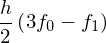

In [13]:
adams(2)

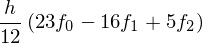

In [14]:
adams(3)

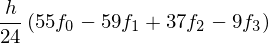

In [15]:
adams(4)

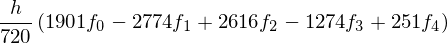

In [16]:
adams(5)

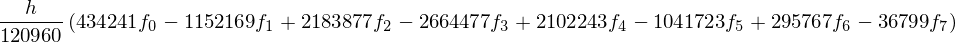

In [17]:
adams(8)

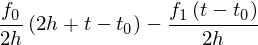

In [18]:
# Aproximacion a la funcion xreplace de sympy
adam=lagrange(2)
H=[t,t1]
r=[t0-2*h]
adam.xreplace({H[1]:r[0]})

In [19]:
# Aproximacion a la funcion xreplace de sympy
def prueba2 (orden):
    separable=lagrange(orden)
    print separable
    s= separable.xreplace({t1: 2})
    return s

In [20]:
x=var('x')
y=var('y')
t=(x**2 + x**4)
print t
t.xreplace({x: y})
print t
#t=x**2+y**2
#t.subs(x,y)
#print t

x**4 + x**2
x**4 + x**2


In [21]:
# Aproximacion a los comados basicos de sympy 
x,y=symbols('x,y')
Add(x,y)